# Water Irrigation

In [1]:
import sqlite3

In [2]:

# conn = sqlite3.connect('datab.db')

# c = conn.cursor()
# c.execute("""CREATE TABLE Customer_Info(username text, password text, location integer)""")
# conn.commit()

# conn.close()

In [3]:
def add_to_database(username, password, location):
        conn = sqlite3.connect('datab.db')

        c = conn.cursor()

        all_user = c.execute("select username from Customer_Info")
        all_user = all_user.fetchall()
        print(all_user)
        if (username,) in all_user:
                conn.commit()
                conn.close()
                return "error1"
        else:
                c.execute(
                        "insert into Customer_Info values (:username,:password,:location)",
                        {
                        'username': username,
                        'password': password,
                        'location': location
                        }
                )
                conn.commit()
                conn.close()
                return "success"
        


In [4]:
def check_in_database(username, password):
    conn = sqlite3.connect('datab.db')

    c = conn.cursor()
    password1 = c.execute("select username, password, location from Customer_Info")
    password1 = password1.fetchall()
    temp1 = (username, password)
    flag = 0
    print(password)
    for i, j, k in password1:
        if i == username and j == password:           
            pincode = k
            flag = 1
            conn.commit()
            conn.close()
            return "success",pincode
    if flag == 0:
        conn.commit()
        conn.close()
        return "error",0

In [5]:
# conn = sqlite3.connect('datab.db')

# c = conn.cursor()
# #c.execute("""CREATE TABLE params(username text,soil_moisture integer, precipitation real, preci_prob real,crop_status integer,irrigation_dur real,date text)""")
# conn.commit()

# conn.close()

In [6]:
def add_params_to_database(username,soil_moisture, precipitation, preci_prob, crop_status,irrigation_dur,date):
        conn = sqlite3.connect('datab.db')

        c = conn.cursor()

        c.execute(
                "insert into params values (:username,:soil_moisture,:precipitation,:preci_prob,:crop_status,:irrigation_dur,:date)",
                {
                'username': username,
                'soil_moisture': soil_moisture,
                'precipitation': precipitation,
                'preci_prob': preci_prob,
                'crop_status': crop_status,
                'irrigation_dur': irrigation_dur,
                'date': date
                }
        )
        conn.commit()
        conn.close()

c:\users\sshre\appdata\local\programs\python\python37\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


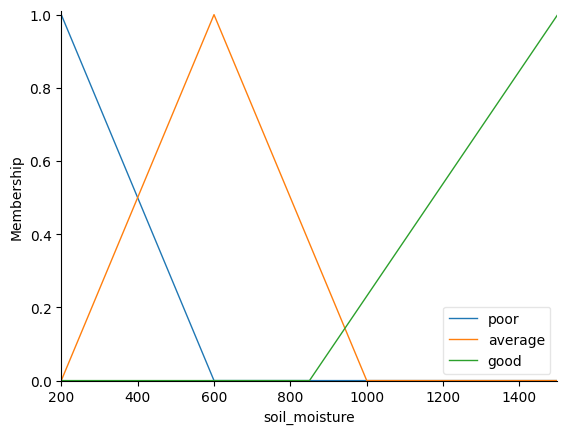

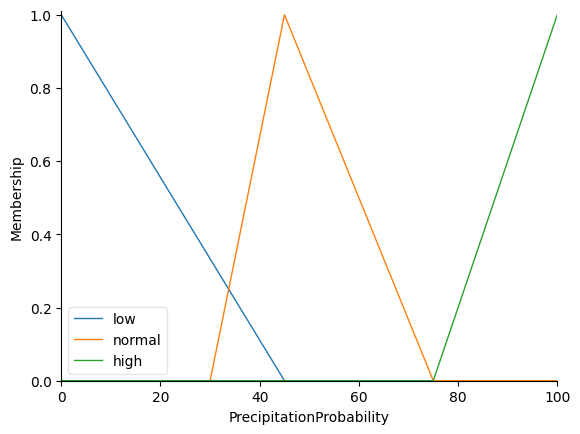

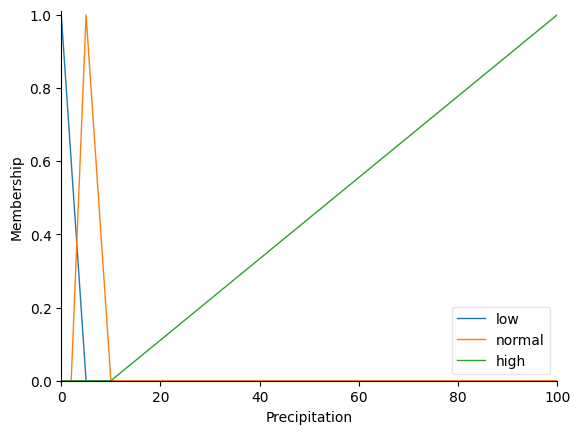

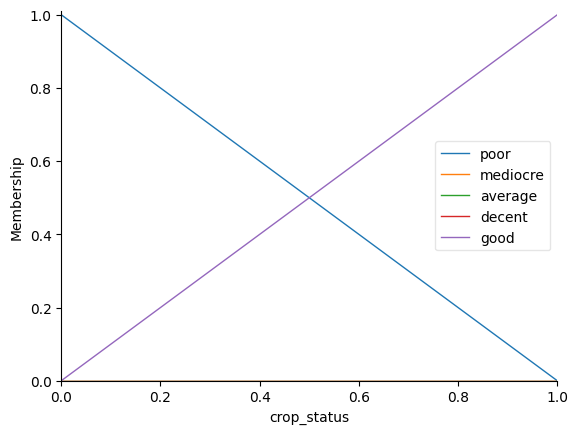

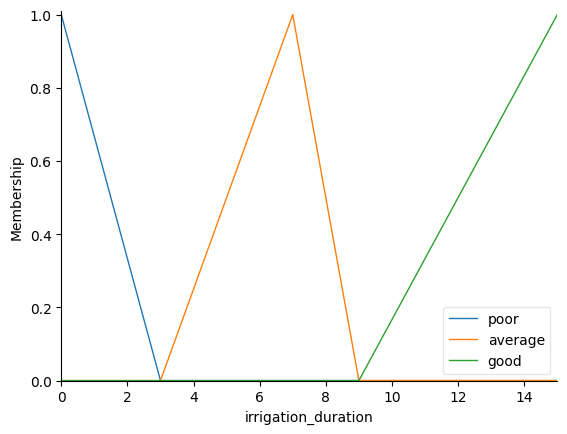

In [7]:
# -*- coding: utf-8 -*-
"""TEMP.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/16_bM1s04HeIm3Fcfb3SUITSvPsaprRoH
"""
# import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

soil_moisture = ctrl.Antecedent(np.arange(200, 1500, 1), 'soil_moisture')
PrecipitationProbability = ctrl.Antecedent(np.arange(0, 101, 1), 'PrecipitationProbability')
Precipitation = ctrl.Antecedent(np.arange(0, 101, 1), 'Precipitation')
crop_status = ctrl.Antecedent(np.arange(0, 2, 1), 'crop_status')
irrigation_duration = ctrl.Consequent(np.arange(0, 16, 1), 'irrigation_duration')

soil_moisture['poor'] = fuzz.trimf(soil_moisture.universe, [200, 200, 600])
soil_moisture['average'] = fuzz.trimf(soil_moisture.universe, [200, 600, 1000])
soil_moisture['good'] = fuzz.trimf(soil_moisture.universe, [850, 1500, 1500])
soil_moisture.view()

PrecipitationProbability['low'] = fuzz.trimf(PrecipitationProbability.universe, [0, 0, 45])
PrecipitationProbability['normal'] = fuzz.trimf(PrecipitationProbability.universe, [30, 45, 75])
PrecipitationProbability['high'] = fuzz.trimf(PrecipitationProbability.universe, [75, 100, 100])
PrecipitationProbability.view()

Precipitation['low'] = fuzz.trimf(Precipitation.universe, [0, 0, 5])
Precipitation['normal'] = fuzz.trimf(Precipitation.universe, [2, 5, 10])
Precipitation['high'] = fuzz.trimf(Precipitation.universe, [10, 100, 100])
Precipitation.view()

crop_status.automf()
crop_status.view()

irrigation_duration['poor'] = fuzz.trimf(irrigation_duration.universe, [0, 0, 3])
irrigation_duration['average'] = fuzz.trimf(irrigation_duration.universe, [3, 7, 9])
irrigation_duration['good'] = fuzz.trimf(irrigation_duration.universe, [9, 15, 15])
irrigation_duration.view()

rule1 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['low'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['good'])
rule2 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['low'] & Precipitation['low'] & crop_status['good'], irrigation_duration['good'])
rule3 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['low'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['average'])
rule4 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['low'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['average'])
rule5 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['low'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule6 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['low'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])
rule7 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['normal'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['average'])
rule8 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['normal'] & Precipitation['low'] & crop_status['good'], irrigation_duration['average'])
rule9 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['normal'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['average'])
rule10 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['normal'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['poor'])
rule11 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['normal'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule12 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['normal'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])
rule13 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['high'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['average'])
rule14 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['high'] & Precipitation['low'] & crop_status['good'], irrigation_duration['poor'])
rule15 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['high'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['average'])
rule16 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['high'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['poor'])
rule17 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['high'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule18 = ctrl.Rule(soil_moisture['poor'] & PrecipitationProbability['high'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])
rule19 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['low'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['good'])
rule20 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['low'] & Precipitation['low'] & crop_status['good'], irrigation_duration['average'])
rule21 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['low'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['average'])
rule22 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['low'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['average'])
rule23 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['low'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule24 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['low'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])
rule25 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['normal'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['good'])
rule26 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['normal'] & Precipitation['low'] & crop_status['good'], irrigation_duration['average'])
rule27 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['normal'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['average'])
rule28 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['normal'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['poor'])
rule29 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['normal'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule30 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['normal'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])
rule31 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['high'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['average'])
rule32 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['high'] & Precipitation['low'] & crop_status['good'], irrigation_duration['poor'])
rule33 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['high'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['average'])
rule34 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['high'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['poor'])
rule35 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['high'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule36 = ctrl.Rule(soil_moisture['average'] & PrecipitationProbability['high'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])
rule37 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['low'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['average'])
rule38 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['low'] & Precipitation['low'] & crop_status['good'], irrigation_duration['average'])
rule39 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['low'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['average'])
rule40 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['low'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['poor'])
rule41 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['low'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule42 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['low'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])
rule43 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['normal'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['average'])
rule44 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['normal'] & Precipitation['low'] & crop_status['good'], irrigation_duration['poor'])
rule45 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['normal'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['average'])
rule46 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['normal'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['poor'])
rule47 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['normal'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule48 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['normal'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])
rule49 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['high'] & Precipitation['low'] & crop_status['poor'], irrigation_duration['poor'])
rule50 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['high'] & Precipitation['low'] & crop_status['good'], irrigation_duration['poor'])
rule51 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['high'] & Precipitation['normal'] & crop_status['poor'], irrigation_duration['poor'])
rule52 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['high'] & Precipitation['normal'] & crop_status['good'], irrigation_duration['poor'])
rule53 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['high'] & Precipitation['high'] & crop_status['poor'], irrigation_duration['poor'])
rule54 = ctrl.Rule(soil_moisture['good'] & PrecipitationProbability['high'] & Precipitation['high'] & crop_status['good'], irrigation_duration['poor'])

waterpump_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28, rule29, rule30, rule31, rule32, rule33, rule34, rule35, rule36, rule37, rule38, rule39, rule40, rule41, rule42, rule43, rule44, rule45, rule46, rule47, rule48, rule49, rule50, rule51, rule52, rule53, rule54])
irrigation_system = ctrl.ControlSystemSimulation(waterpump_ctrl)

def Output(moist, preci_prob, Precipitation, Image_Processsing):
    irrigation_system.input['soil_moisture'] = moist
    irrigation_system.input['PrecipitationProbability'] = preci_prob
    irrigation_system.input['Precipitation'] = Precipitation
    irrigation_system.input['crop_status'] = Image_Processsing
    irrigation_system.compute()
    return irrigation_system.output['irrigation_duration']

In [8]:
import requests
def weather(pincode):
    apikey = "4b1afa9e3610b1ff2c190b4ca4d2d3c0"
    url="https://api.openweathermap.org/data/2.5/weather?q="
    city=pincode
    city_url=url+str(city)+"&appid="+apikey
    response = requests.get(city_url)
    print(response.json())
#     a = response["days"]
#     a = a[0]
#     a = a["precipprob"]
# 
#     b = response["currentConditions"]
#     b = b["precip"]
#     c = [0,0]

    # return c    

In [9]:
weather("Pune")

{'coord': {'lon': 73.8553, 'lat': 18.5196}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 299.58, 'feels_like': 299.58, 'temp_min': 299.58, 'temp_max': 299.58, 'pressure': 1010, 'humidity': 87, 'sea_level': 1010, 'grnd_level': 948}, 'visibility': 10000, 'wind': {'speed': 0.95, 'deg': 349, 'gust': 1.27}, 'clouds': {'all': 100}, 'dt': 1723950724, 'sys': {'type': 2, 'id': 2091523, 'country': 'IN', 'sunrise': 1723942031, 'sunset': 1723987797}, 'timezone': 19800, 'id': 1259229, 'name': 'Pune', 'cod': 200}


In [10]:
import sqlite3
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def make_graph(username):
    conn = sqlite3.connect("datab.db")

    c = conn.cursor()
    data = c.execute("""select * from params order by date desc""")
    data = data.fetchall()
    count = 10


    irrigation_dur = []
    date = []

    for i, j, k, l, m, n, o in data:
        if count >0 and i==username:
            irrigation_dur.append(n)
            abc = o[6:] + "-" + o[4:6] + " " + o[0:4]
            # print(abc)
            date.append(abc)
            count = count - 1

    my_xticks = date
    x = range(1,len(date)+1)
    plt.xticks(x, my_xticks, rotation = 70)
    plt.plot(x, irrigation_dur,color='blue', marker='o',markerfacecolor='red', markersize=5)
    plt.legend(['Irrigation duration'])
    plt.xlabel("Date")
    plt.ylabel("Irrigation Duration")
    plt.title("Last 10 hours log")
    plt.tight_layout()
    plt.savefig("static/images/abc.png")
    plt.show()
    conn.commit()
    conn.close()



 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [18/Aug/2024 08:42:59] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Aug/2024 08:42:59] "GET /static/css/style.css HTTP/1.1" 200 -
127.0.0.1 - - [18/Aug/2024 08:42:59] "GET /static/images/log.svg HTTP/1.1" 200 -
127.0.0.1 - - [18/Aug/2024 08:42:59] "GET /static/images/register.svg HTTP/1.1" 200 -
127.0.0.1 - - [18/Aug/2024 08:43:00] "GET /static/script/app.js HTTP/1.1" 200 -
127.0.0.1 - - [18/Aug/2024 08:43:00] "GET /favicon.ico HTTP/1.1" 404 -


789


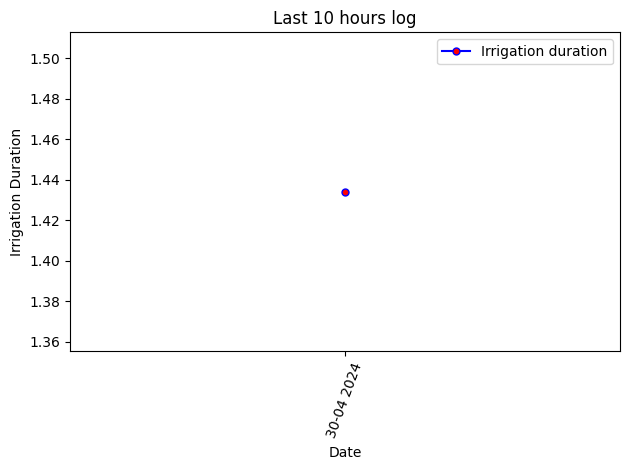

127.0.0.1 - - [18/Aug/2024 08:43:05] "POST /dashboard HTTP/1.1" 200 -
127.0.0.1 - - [18/Aug/2024 08:43:05] "GET /static/css/style1.css HTTP/1.1" 200 -
127.0.0.1 - - [18/Aug/2024 08:43:05] "GET /static/script/graph.js HTTP/1.1" 200 -
127.0.0.1 - - [18/Aug/2024 08:43:05] "GET /static/images/abc.png HTTP/1.1" 200 -


In [11]:
import time
from datetime import datetime as dt
import matplotlib.pyplot as plt
from flask import Flask,redirect,url_for,render_template,request
# from flask import Markup
from markupsafe import Markup
import random
app = Flask(__name__)

@app.route('/')
def login():
    #return "HEY"
    return render_template('index.html')

@app.route('/signin',methods = ['POST'])
def collect():
    if request.method == 'POST':
        print("in")
        username = request.form['username']
        print(username)
        password = request.form['Password']
        print(password)
        location = request.form['location']
        print(location)
        m = add_to_database(username,password,location)
        if m == "success" :
            return render_template('index.html')
        elif m == "error1":
            return render_template('index.html', error = "Username already exists")

@app.route('/dashboard',methods = ['POST'])
def verify():
    global preci_prob,preci,username
    if request.method == 'POST':
        username = request.form['user']
        password = request.form['pass']
        x = check_in_database(username,password)
        if x[0] == "error":
            return render_template('index.html', error = "Invalid Username or password")
        else :
            # preci_prob,preci = weather(x[1])
            soilc = random.randrange(200,1500, 1)
            preci_prob=random.random().__round__(2)
            preci=random.randrange(2,20)
            duration = Output(soilc,preci_prob,preci,0)
            duration = format(duration, ".3f")
            today = dt.today()
            make_graph(username)
            month = str(today.month)
            if len(month) != 2:
                month = "0"+month
            year = today.year
            day = str(today.day)
            if len(day) != 2:
                day = "0"+day
            a = str(year) + str(month) + str(day)
            add_params_to_database(username,soilc, preci, preci_prob, 0,duration,a)
            #make_graph(username)
            return render_template('dashboard.html',soil = soilc,preci_pro = preci_prob,prec = preci,username = username,duration = duration,crop = 0)

        
# @app.route('/submit',methods = ['POST','GET'])
# def get_duration():
#     if request.method == 'POST':
#         moisture_content = float(request.form['sensor'])
#         print(moisture_content)
#         #preci = float(request.form['preci'])
#         #preci_prob = float(request.form['preci_prob'])
#         image_path = request.form['img']
#         #img_status = Image_Process(image_path)
#         #irrigation_dur = irrigation_duration(moisture_content,preci,preci_prob,img_status)
#         #print("path"+image_path)
#         date = "03/04/2022"
#         duration = 30
#         add_params_to_database(username,moisture_content=200, preci=1, preci_prob=3, img_status=0,irrigation_dur = 10,date = "03/04/2022")
#         return render_template('dashboard.html',preci_pro = preci_prob,prec = preci,username = username,duration = duration)

        
if __name__=='__main__':
    app.run()
